# Import libraries

In [23]:
# ! pip install faker 

In [24]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta
from uuid import uuid4
from tqdm import tqdm
from random import randint, uniform
from faker.providers import BaseProvider
import warnings
warnings.simplefilter('ignore')

In [25]:
fake = Faker()
start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 1, 1)

In [26]:
def generate_random_id():
    return(uuid4().hex)

# Data generation

## Region

In [27]:
world = pd.read_csv("../Data/worldcities.csv")
cameroon_cities = world[world['country']=='Cameroon']
gabon_cities = world[world['country']=='Gabon'].iloc[:5]
nigeria_cities = world[world['country']=='Nigeria'].iloc[:10]
cities = pd.concat([cameroon_cities, gabon_cities])
cities = pd.concat([cities, nigeria_cities])
print(cities.country.nunique())
print(cities.shape)
cities.head()

3
(102, 11)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
97,Douala,Douala,4.0500,9.7000,Cameroon,CM,CMR,Littoral,admin,5768400.0,1120494607
333,Yaoundé,Yaounde,3.8667,11.5167,Cameroon,CM,CMR,Centre,primary,2440462.0,1120298240
417,Bamenda,Bamenda,5.9614,10.1517,Cameroon,CM,CMR,North-West,admin,2000000.0,1120909610
1249,Garoua,Garoua,9.3000,13.4000,Cameroon,CM,CMR,Nord,admin,600000.0,1120803808
1250,Bafoussam,Bafoussam,5.4667,10.4167,Cameroon,CM,CMR,Ouest,admin,600000.0,1120435460


#### city repartition

In [28]:
# les villes les plus peuplés doivent avoir le plus de transaction

city_top5 = cameroon_cities.head(5)
city_top10 = cameroon_cities.head(10)

## Customer data

In [29]:
from random import randint, uniform
from faker.providers import BaseProvider

class CameroonPhoneProvider(BaseProvider):
    def phone_number(self):
        """Generates a fake Cameroon phone number in a random format."""
        formats = [
            "+237 65ABCDEFG",
            "+237 67ABCDEFG",
            "+237 68ABCDEFG",
            "+237 69ABCDEFG",
        ]
        format_str = formats[randint(0, len(formats) - 1)]
        phone_number = format_str.replace("A", str(randint(0, 9)))
        phone_number = phone_number.replace("B", str(randint(0, 9)))
        phone_number = phone_number.replace("C", str(randint(0, 9)))
        phone_number = phone_number.replace("D", str(randint(0, 9)))
        phone_number = phone_number.replace("E", str(randint(0, 9)))
        phone_number = phone_number.replace("F", str(randint(0, 9)))
        phone_number = phone_number.replace("G", str(randint(0, 9)))
        return phone_number

fake = Faker()
fake.add_provider(CameroonPhoneProvider)

cam_phone_number = fake.phone_number()
print(cam_phone_number)

+237 674878378


In [30]:
# création de la première partie du dataFrame avant d'ajouter la répartition selon les villes
customers_list = []
for i in tqdm(range(10000)):
    first_name = fake.first_name()
    last_name = fake.last_name()
    domain = fake.domain_name()
    email = f"{first_name}.{last_name}@{domain}"
    phone_number = cam_phone_number
    registration_date = fake.date_between(datetime(2005,1,1), datetime(2018,1,1))
    date_of_birth = fake.date_of_birth(minimum_age=30, maximum_age=75)
    address = fake.address()

    data_dict = {
        'customer_id' :generate_random_id(), 
        'first_name': first_name, 
        'last_name': last_name,
        'email': email,
        'phone_number': phone_number,
        'registration_date': registration_date,
        'date_of_birth' : date_of_birth,
        'address': address,
        }
    customers_list.append(data_dict)
customer_df = pd.DataFrame(customers_list)
print(customer_df.shape)

100%|██████████| 10000/10000 [00:17<00:00, 577.42it/s]

(10000, 8)


In [31]:
# scinder le df pour attribuer le plus de population aux grandes villes
customer_df_1 = customer_df.iloc[:4000]
customer_df_2 = customer_df.iloc[4000:7000].reset_index().drop(columns="index")
customer_df_3 = customer_df.iloc[7000:].reset_index().drop(columns="index")

In [32]:
city_1_list = []
for cust in customer_df_1.iterrows():
    city_1 = random.choice(list(city_top5.city))
    city_1_dict = {
        'city': city_1,
        'region' : cameroon_cities[cameroon_cities.city == city_1]['admin_name'].iloc[0]
    }
    city_1_list.append(city_1_dict)
customer_df_1[["city", "region"]] = pd.DataFrame(city_1_list)
customer_df_1.head()


,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,aae1a23890f84025b0140c9f3d04201a,Morgan,White,Morgan.White@mccarthy.com,+237 674878378,2015-03-25,1970-11-27,"PSC 5331, Box 0759\nAPO AE 27750",Douala,Littoral
1,a01cce153bd54fd087901b862f3f13eb,Michael,Brown,Michael.Brown@ruiz-kemp.com,+237 674878378,2010-04-23,1985-09-27,"6241 Katherine Forge Apt. 443\nPort Jerome, MP...",Bafoussam,Ouest
2,6f69cf4f59b74629a2619b1153663e8e,Latoya,Gill,Latoya.Gill@ruiz.com,+237 674878378,2008-04-17,1965-02-11,"851 Mcpherson Isle Suite 170\nTorresland, MN 7...",Bamenda,North-West
3,c05ce9b1bf4a42d9a902fe335cb639ed,Michael,Gibbs,Michael.Gibbs@davis-perez.com,+237 674878378,2015-09-20,1991-11-10,"056 Richard Mountain\nPort Dennishaven, NY 29586",Yaoundé,Centre
4,cbc156d43fea40eeb57479acdbfc0828,Raymond,Dudley,Raymond.Dudley@stone.com,+237 674878378,2011-07-19,1978-01-25,"991 Green Spur Suite 102\nEast Annaport, PW 70533",Yaoundé,Centre


In [33]:
city_2_list = []
for cust in customer_df_2.iterrows():
    city_2 = random.choice(list(city_top5.city))
    city_2_dict = {
        'city': city_2,
        'region' : cameroon_cities[cameroon_cities.city == city_2]['admin_name'].iloc[0]
    }
    city_2_list.append(city_2_dict)
customer_df_2[["city", "region"]] = pd.DataFrame(city_2_list)
customer_df_2.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,4bc255226f63472b95fdce37265596ab,Robert,Love,Robert.Love@daniels-baker.com,+237 674878378,2015-06-15,1960-02-26,"92067 Karen Avenue\nMichaelbury, GA 05179",Douala,Littoral
1,afd1386ebac34fd6b83773903a857f36,Melanie,Hamilton,Melanie.Hamilton@lawson.org,+237 674878378,2010-09-12,1968-09-30,"028 Cortez Inlet\nEast Michael, NH 92937",Bamenda,North-West
2,3873ec3c6f774625bfbfa2aef59c81d0,Lauren,Larson,Lauren.Larson@harris-wagner.com,+237 674878378,2016-04-30,1981-01-23,"84571 Rodriguez Extension\nNew Stephanieport, ...",Bamenda,North-West
3,b77fbcaf261747f194a4c67155271ec0,Nicholas,Stanley,Nicholas.Stanley@richardson.net,+237 674878378,2009-11-20,1972-08-19,"743 Curtis Pass Apt. 152\nSouth Jessicaside, M...",Yaoundé,Centre
4,24ec5f78118e49bb9223622c5f24eb43,Andrea,Smith,Andrea.Smith@rogers-arnold.biz,+237 674878378,2015-09-11,1960-07-07,"5431 Clinton Junctions Suite 793\nShaneview, G...",Bafoussam,Ouest


In [34]:
city_3_list = []
for cust in customer_df_3.iterrows():
    city_3 = random.choice(list(cities.city))
    city_3_dict = {
        'city': city_3,
        'region' : cities[cities.city == city_3]['admin_name'].iloc[0]
    }
    city_3_list.append(city_3_dict)
customer_df_3[["city", "region"]] = pd.DataFrame(city_3_list)
customer_df_3.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,ebc2c991e02b4015a4b88ee38f0983dd,Susan,Bryant,Susan.Bryant@smith.net,+237 674878378,2006-07-09,1951-10-25,777 Hoffman Summit Suite 154\nNorth Kimberlyla...,Garoua Boulaï,Est
1,7a20f957531a4a529f40dfade3ec2596,Heather,Walker,Heather.Walker@mendez.org,+237 674878378,2011-07-04,1951-07-08,"72863 Michele Park Apt. 639\nJamesshire, FL 94048",Maroua,Extrême-Nord
2,9deecaab048a44bbb3faaab57c36ff52,Joanne,Black,Joanne.Black@ramirez-mcdaniel.com,+237 674878378,2012-10-02,1966-06-06,"94425 Mary Points Apt. 586\nRandallfurt, ID 67758",Kekem,Ouest
3,765284456f244b0f94f659a55ac78974,Stephen,Reynolds,Stephen.Reynolds@peterson.org,+237 674878378,2013-09-06,1975-07-28,"8383 Gomez Cove\nSouth Michael, CT 34563",Tefam,Ouest
4,8b2556c8c1894ac1ba7b0e47b606cb51,Mallory,Baker,Mallory.Baker@young.com,+237 674878378,2007-03-15,1979-01-12,"9809 Martinez Manors\nEast Bruce, LA 30407",Abuja,Federal Capital Territory


In [35]:
customer_df_final = pd.concat([customer_df_1, customer_df_2, customer_df_3], axis=0)
customer_df_final.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,aae1a23890f84025b0140c9f3d04201a,Morgan,White,Morgan.White@mccarthy.com,+237 674878378,2015-03-25,1970-11-27,"PSC 5331, Box 0759\nAPO AE 27750",Douala,Littoral
1,a01cce153bd54fd087901b862f3f13eb,Michael,Brown,Michael.Brown@ruiz-kemp.com,+237 674878378,2010-04-23,1985-09-27,"6241 Katherine Forge Apt. 443\nPort Jerome, MP...",Bafoussam,Ouest
2,6f69cf4f59b74629a2619b1153663e8e,Latoya,Gill,Latoya.Gill@ruiz.com,+237 674878378,2008-04-17,1965-02-11,"851 Mcpherson Isle Suite 170\nTorresland, MN 7...",Bamenda,North-West
3,c05ce9b1bf4a42d9a902fe335cb639ed,Michael,Gibbs,Michael.Gibbs@davis-perez.com,+237 674878378,2015-09-20,1991-11-10,"056 Richard Mountain\nPort Dennishaven, NY 29586",Yaoundé,Centre
4,cbc156d43fea40eeb57479acdbfc0828,Raymond,Dudley,Raymond.Dudley@stone.com,+237 674878378,2011-07-19,1978-01-25,"991 Green Spur Suite 102\nEast Annaport, PW 70533",Yaoundé,Centre


In [36]:
customer_df_final.to_csv('../Data/Train/customers.csv', index=False)

## Device data

In [37]:

#creation de id

def create_id():
    return str(uuid4())

#creation des types d'appareils
def generate_device_type():
    return random.choice(['mobile', 'tablette'])

#creation des os

def generate_os():
    return random.choice(['android', 'ios', 'mac', 'windows', 'linux'])

#creation des fabricants
manufacturer_and_model={
                        'dell':['XPS 13', 'INSPIRON 15', 'LATITUDE 7410', 'PRECISION 5550'],
                        'HP': ['spectre x360', 'envy 13', 'pavillon 15', 'OMEN 15'],
                        'LG': ['spectre x3670', 'envy45','Gram 17', 'Wing 5G', ' NanoCell TV'],
                        'SONY':['Xperia 1 III', 'Xperia 5 II', 'Bravia OLDE', 'VAIO SX14'],
                        'Apple':['iphone 13', 'ipad pro', 'iphone Xr'],
                        'Sharp':['Aquos R6', 'aquos sense 5g', ' dynabook v8']
                        }
#def generate_manufacturer():
    #return random.choices(['dell', 'hp', 'lg', 'sony', 'apple', 'sharp', 'lenovo', 'acer', 'tecno','itel', 'huawei', 'samsung', 'google'])

#creation des modeles

def generate_model(type):
    return random.choice(manufacturer_and_model[type])

#creation de la table devices

def create_devices_table(lenght= 100000):

    devices= pd.DataFrame()

    # les listes
    device_id_list=[]
    devices_type_list=[]
    devices_manufacturer_list=[]
    devices_model_list=[]
    devices_last_used_list=[]
    devices_os_list=[]

    #generer les valeurs
    for i in tqdm(range(lenght)):
        devices_id=create_id()
        devices_type= generate_device_type()
        devices_last_used= fake.date_time_between(start_date= '-5y', end_date='now')
        devices_os= generate_os()
        devices_manufacturer= random.choice(list(manufacturer_and_model.keys()))
        devices_model= generate_model(devices_manufacturer)

        #ajout dans les listes
        device_id_list.append(devices_id)
        devices_type_list.append(devices_type)
        devices_model_list.append( devices_model)
        devices_manufacturer_list.append( devices_manufacturer)
        devices_last_used_list.append(devices_last_used)
        devices_os_list.append(devices_os)
        
     #assigner aux colonnes de la table devices
    devices['device_id']= device_id_list
    devices['device_type']= devices_type_list
    devices['os']= devices_os_list
    devices['manufacturer']= devices_manufacturer_list
    devices['model']= devices_model_list
    devices['last_used']= devices_last_used_list

    return devices

devices= create_devices_table()
devices

100%|██████████| 100000/100000 [00:09<00:00, 10080.90it/s]


,device_id,device_type,os,manufacturer,model,last_used
0,06541b61-b69c-4cb5-97d9-7f06ac10f5d7,mobile,linux,LG,Gram 17,2020-10-24 01:22:19
1,776ca6be-bc20-4ac6-af4c-4fe0c4b26a86,tablette,ios,Sharp,Aquos R6,2020-07-22 10:19:26
2,e6d85865-1263-45a9-86f4-82e8bda35dee,mobile,windows,LG,NanoCell TV,2022-07-24 00:39:22
3,70b34b3f-3c55-4e17-9bf1-549219cea31f,tablette,windows,Apple,iphone Xr,2020-03-02 13:32:33
4,94e8a482-c971-47f3-8b3c-711968667b1e,tablette,mac,Sharp,aquos sense 5g,2024-07-11 03:15:40
...,...,...,...,...,...,...
99995,9769403b-2acb-4034-aaa5-2663d5a12c9c,mobile,windows,dell,XPS 13,2021-08-08 15:46:34
99996,d1015eca-9364-452c-983e-355aac7734bf,mobile,windows,dell,LATITUDE 7410,2021-05-13 01:01:10
99997,f6a2a675-c5b2-4a89-8a79-7e3da9c81b5f,tablette,windows,LG,envy45,2023-05-13 00:06:33
99998,b8e87053-8102-47d2-bcf0-cac0311ff819,mobile,mac,LG,NanoCell TV,2020-06-29 09:59:20


In [138]:
devices.to_csv('../Data/Train/devices.csv', index=False)

## Transaction data

In [139]:
location_list = list(cities.city)
transaction_list=[]
customer_id_list = list(customer_df_final["customer_id"])

def is_fraud_trans(status):
    if status == "échouée":
        return 1
    else:
        return 0
    

trend_factor = 1.0001
seasonal_amplitude = 0.3
seasonal_period = 365 


for i in tqdm(range(100000)):
    transaction_id = generate_random_id()
    customer_id = random.choice(customer_id_list)
    transaction_type = random.choices(["retrait", "depôt", "transfert"], weights=[0.25, 0.5, 0.25])[0] # liste pondérée
    device_id = random.choice(list(devices["device_id"]))
    choices = ["échouée", "réussie"]
    poids = [0.1, 0.9]
    status = random.choices(choices, weights=poids)[0] # liste pondérée
    days_between = (end_date - start_date).days
    transaction_date = start_date + timedelta(days=random.randint(0, days_between))

    # Calcul de la tendance
    days_since_start = (transaction_date - start_date).days
    trend = trend_factor ** days_since_start

    # Calcul de la saisonnalité
    seasonal_effect = 1 + seasonal_amplitude * np.sin(2 * np.pi * days_since_start / seasonal_period)

    # Montant ajusté par la tendance et la saisonnalité
    base_amount = random.uniform(100, 10000000)
    amount = base_amount * trend * seasonal_effect

    transaction_dict = {
        "transaction_id": transaction_id,
        "customer_id": customer_id,
        "device_id": device_id,
        "transaction_date": transaction_date,
        "transaction_type": transaction_type,
        "amount": amount,
        "status": status,
        "is_fraud": is_fraud_trans(status)
    }

    transaction_list.append(transaction_dict)

transaction_df = pd.DataFrame(transaction_list)
print(transaction_df.shape)
transaction_df.head()

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [26:47<00:00, 62.21it/s] 


(100000, 8)


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud
0,dd2bffc0808f4b96a77e5cf112fca9b6,85098e3da5da44aaa19c68bfd24d1dc0,8bc566ab-d827-4924-b38e-7952c883dad9,2022-11-13,depôt,1.398501e+06,réussie,0
1,56b74ad05e6a44249f550b6bab416e43,878403cb7621438aa852c2943bfc61ca,202a2ec6-6dc7-4f73-9e3a-0ccbe5f0e6c9,2020-04-08,retrait,4.249703e+06,réussie,0
2,e5b694d89c3f4bc1ae62b2e254866f79,6b4984e18ae3444e903d84652bb77d84,53e010e8-3561-4ad6-8917-8fd94f76c427,2018-03-20,transfert,9.459800e+06,réussie,0
3,2435dbe1415943f09cb8433cd84f33d7,094c7a71bffa4cad9f560da787c319e2,5af7c8c4-8c46-4e49-9131-37dfd88d8578,2021-09-24,retrait,3.524150e+06,réussie,0
4,c03f18bb841f4663b7dff63d389b76c4,72043daa9f964bd1b06438ad2d8c3cf5,557c49eb-d730-4a61-91ba-e22340c4782f,2023-03-23,depôt,2.293050e+06,réussie,0


In [140]:
transaction_df_1 = transaction_df.iloc[:40000]
transaction_df_2 = transaction_df.iloc[40000:70000].reset_index().drop(columns="index")
transaction_df_3 = transaction_df.iloc[70000:].reset_index().drop(columns="index")

In [141]:
location_1_list = []
for trans in transaction_df_1.iterrows():
    location_1 = random.choice(list(city_top5.city))
    location_1_dict = {
        'location': location_1,
    }
    location_1_list.append(location_1_dict)
transaction_df_1[["location"]] = pd.DataFrame(location_1_list)
print(transaction_df_1.isna().sum())
print("\n------------------------------------------------\n")


transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [142]:
location_2_list = []
for trans in transaction_df_2.iterrows():
    location_2 = random.choice(list(city_top10.city))
    location_2_dict = {
        'location': location_2,
    }
    location_2_list.append(location_2_dict)
transaction_df_2[["location"]] = pd.DataFrame(location_2_list)
print(transaction_df_2.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [143]:
location_3_list = []
for trans in transaction_df_3.iterrows():
    location_3 = random.choice(list(cities.city))
    location_3_dict = {
        'location': location_3,
    }
    location_3_list.append(location_3_dict)
transaction_df_3[["location"]] = pd.DataFrame(location_3_list)
print(transaction_df_3.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [144]:
transaction_df_ = pd.concat([transaction_df_1, transaction_df_2, transaction_df_3])
transaction_df_.shape 

(100000, 9)

In [145]:
transaction_df_.isna().sum()

transaction_id      0
customer_id         0
device_id           0
transaction_date    0
transaction_type    0
amount              0
status              0
is_fraud            0
location            0
dtype: int64

#### location_fraud

In [146]:
is_fraud_list = []
for transaction in tqdm(transaction_df_.iterrows()):
    if transaction[1]['location'] not in list(cameroon_cities.city):
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_.head()

100000it [00:22, 4486.52it/s]


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,dd2bffc0808f4b96a77e5cf112fca9b6,85098e3da5da44aaa19c68bfd24d1dc0,8bc566ab-d827-4924-b38e-7952c883dad9,2022-11-13,depôt,1.398501e+06,réussie,0,Bamenda
1,56b74ad05e6a44249f550b6bab416e43,878403cb7621438aa852c2943bfc61ca,202a2ec6-6dc7-4f73-9e3a-0ccbe5f0e6c9,2020-04-08,retrait,4.249703e+06,réussie,0,Garoua
2,e5b694d89c3f4bc1ae62b2e254866f79,6b4984e18ae3444e903d84652bb77d84,53e010e8-3561-4ad6-8917-8fd94f76c427,2018-03-20,transfert,9.459800e+06,réussie,0,Yaoundé
3,2435dbe1415943f09cb8433cd84f33d7,094c7a71bffa4cad9f560da787c319e2,5af7c8c4-8c46-4e49-9131-37dfd88d8578,2021-09-24,retrait,3.524150e+06,réussie,0,Bamenda
4,c03f18bb841f4663b7dff63d389b76c4,72043daa9f964bd1b06438ad2d8c3cf5,557c49eb-d730-4a61-91ba-e22340c4782f,2023-03-23,depôt,2.293050e+06,réussie,0,Douala


### device_fraud

In [147]:
selection = pd.DataFrame(transaction_df_.device_id.value_counts()>=3).reset_index()
device_fraud = list(selection[selection['count']].device_id)
is_fraud_list = []
for transaction in tqdm(transaction_df_.iterrows()):
    if transaction[1]['device_id'] in device_fraud:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_.head()

100000it [01:45, 946.29it/s]


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,dd2bffc0808f4b96a77e5cf112fca9b6,85098e3da5da44aaa19c68bfd24d1dc0,8bc566ab-d827-4924-b38e-7952c883dad9,2022-11-13,depôt,1.398501e+06,réussie,1,Bamenda
1,56b74ad05e6a44249f550b6bab416e43,878403cb7621438aa852c2943bfc61ca,202a2ec6-6dc7-4f73-9e3a-0ccbe5f0e6c9,2020-04-08,retrait,4.249703e+06,réussie,0,Garoua
2,e5b694d89c3f4bc1ae62b2e254866f79,6b4984e18ae3444e903d84652bb77d84,53e010e8-3561-4ad6-8917-8fd94f76c427,2018-03-20,transfert,9.459800e+06,réussie,0,Yaoundé
3,2435dbe1415943f09cb8433cd84f33d7,094c7a71bffa4cad9f560da787c319e2,5af7c8c4-8c46-4e49-9131-37dfd88d8578,2021-09-24,retrait,3.524150e+06,réussie,0,Bamenda
4,c03f18bb841f4663b7dff63d389b76c4,72043daa9f964bd1b06438ad2d8c3cf5,557c49eb-d730-4a61-91ba-e22340c4782f,2023-03-23,depôt,2.293050e+06,réussie,0,Douala


In [148]:
transaction_df_final = transaction_df_
transaction_df_final.head()

,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,dd2bffc0808f4b96a77e5cf112fca9b6,85098e3da5da44aaa19c68bfd24d1dc0,8bc566ab-d827-4924-b38e-7952c883dad9,2022-11-13,depôt,1.398501e+06,réussie,1,Bamenda
1,56b74ad05e6a44249f550b6bab416e43,878403cb7621438aa852c2943bfc61ca,202a2ec6-6dc7-4f73-9e3a-0ccbe5f0e6c9,2020-04-08,retrait,4.249703e+06,réussie,0,Garoua
2,e5b694d89c3f4bc1ae62b2e254866f79,6b4984e18ae3444e903d84652bb77d84,53e010e8-3561-4ad6-8917-8fd94f76c427,2018-03-20,transfert,9.459800e+06,réussie,0,Yaoundé
3,2435dbe1415943f09cb8433cd84f33d7,094c7a71bffa4cad9f560da787c319e2,5af7c8c4-8c46-4e49-9131-37dfd88d8578,2021-09-24,retrait,3.524150e+06,réussie,0,Bamenda
4,c03f18bb841f4663b7dff63d389b76c4,72043daa9f964bd1b06438ad2d8c3cf5,557c49eb-d730-4a61-91ba-e22340c4782f,2023-03-23,depôt,2.293050e+06,réussie,0,Douala


In [149]:
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['amount'] >= 7000000:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [00:12, 7834.19it/s]


,transaction_id,customer_id,device_id,transaction_date,transaction_type,amount,status,is_fraud,location
0,dd2bffc0808f4b96a77e5cf112fca9b6,85098e3da5da44aaa19c68bfd24d1dc0,8bc566ab-d827-4924-b38e-7952c883dad9,2022-11-13,depôt,1.398501e+06,réussie,1,Bamenda
1,56b74ad05e6a44249f550b6bab416e43,878403cb7621438aa852c2943bfc61ca,202a2ec6-6dc7-4f73-9e3a-0ccbe5f0e6c9,2020-04-08,retrait,4.249703e+06,réussie,0,Garoua
2,e5b694d89c3f4bc1ae62b2e254866f79,6b4984e18ae3444e903d84652bb77d84,53e010e8-3561-4ad6-8917-8fd94f76c427,2018-03-20,transfert,9.459800e+06,réussie,1,Yaoundé
3,2435dbe1415943f09cb8433cd84f33d7,094c7a71bffa4cad9f560da787c319e2,5af7c8c4-8c46-4e49-9131-37dfd88d8578,2021-09-24,retrait,3.524150e+06,réussie,0,Bamenda
4,c03f18bb841f4663b7dff63d389b76c4,72043daa9f964bd1b06438ad2d8c3cf5,557c49eb-d730-4a61-91ba-e22340c4782f,2023-03-23,depôt,2.293050e+06,réussie,0,Douala


In [150]:
transaction_df_final.is_fraud.value_counts()

is_fraud
1    56427
0    43573
Name: count, dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

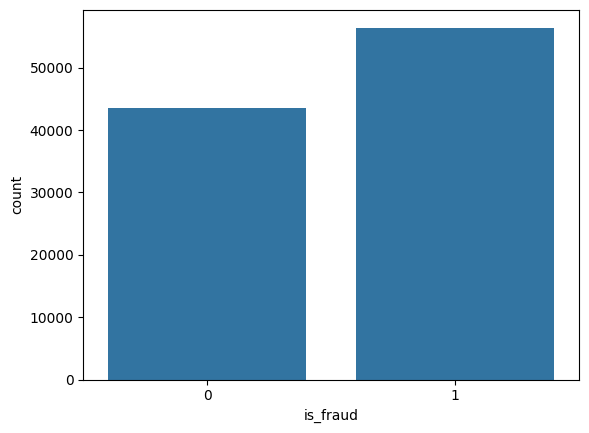

In [151]:
import seaborn as sns
sns.countplot(transaction_df_final, x='is_fraud')

In [152]:
transaction_df_final.to_csv('../Data/Train/transactions.csv', index=False)

## Transaction history data

In [153]:
transaction_history_list = []

for i, transaction in tqdm(transaction_df_final.iterrows()):
    history_id = generate_random_id()
    customer_id = transaction.customer_id
    transaction_id = transaction.transaction_id
    previous_balance = transaction.amount + uniform(0, 10000000)

    if transaction.transaction_type == "depôt":
        new_balance = previous_balance + transaction.amount
    else:
        new_balance = previous_balance - transaction.amount
        
    transaction_date = transaction.transaction_date

    transaction_history_dict = {
        "history_id" : history_id,
        "customer_id" : customer_id,
        "transaction_id" : transaction_id,
        "previous_balance" : previous_balance,
        "new_balance" : new_balance,
        "transaction_date": transaction_date
    }
    transaction_history_list.append(transaction_history_dict)

transaction_history_df = pd.DataFrame(transaction_history_list)
print(transaction_history_df.shape)
transaction_history_df.head()

100000it [00:21, 4584.37it/s]


(100000, 6)


,history_id,customer_id,transaction_id,previous_balance,new_balance,transaction_date
0,a51a69354d5f4285a0c529f2dcf9fb47,85098e3da5da44aaa19c68bfd24d1dc0,dd2bffc0808f4b96a77e5cf112fca9b6,7.768225e+06,9.166725e+06,2022-11-13
1,200bce385ca74abab2f6d5cbca522bfb,878403cb7621438aa852c2943bfc61ca,56b74ad05e6a44249f550b6bab416e43,5.439467e+06,1.189764e+06,2020-04-08
2,d52e028472b24820938ff1b1af665a64,6b4984e18ae3444e903d84652bb77d84,e5b694d89c3f4bc1ae62b2e254866f79,1.312786e+07,3.668063e+06,2018-03-20
3,8502d8b6403a432db854384dd887995d,094c7a71bffa4cad9f560da787c319e2,2435dbe1415943f09cb8433cd84f33d7,9.494505e+06,5.970355e+06,2021-09-24
4,78eb3e81dc3a4239bf5629247b0b1096,72043daa9f964bd1b06438ad2d8c3cf5,c03f18bb841f4663b7dff63d389b76c4,7.871750e+06,1.016480e+07,2023-03-23


In [154]:
transaction_history_df.to_csv('../Data/Train/transaction_history.csv', index=False)

## Transaction pattern data

In [155]:
customer_id_list = customer_df["customer_id"]
print(customer_id_list)

0       aae1a23890f84025b0140c9f3d04201a
1       a01cce153bd54fd087901b862f3f13eb
2       6f69cf4f59b74629a2619b1153663e8e
3       c05ce9b1bf4a42d9a902fe335cb639ed
4       cbc156d43fea40eeb57479acdbfc0828
                      ...               
9995    6917f80e97024a3187567745b58b17af
9996    a14810218484485080af3b55a3e5befc
9997    9b62017d164846fb9c6a0ed7e7861be4
9998    93eba3ecc8ed44fd9a3474e4f354c764
9999    5571cb2565e54d50a8aa9e906cafa359
Name: customer_id, Length: 10000, dtype: object


In [156]:
import numpy as np
import pandas as  pd 
import random
from faker import Faker
from uuid import uuid4
from tqdm import tqdm

faker= Faker()

# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer un montant moyen aléatoire
def generate_average_amount():
    return round(random.uniform(5.0, 1000.0), 2)

# Fonction pour générer une fréquence de transactions aléatoire
def generate_frequency():
    return random.randint(1, 30)

# Fonction pour générer une localisation fréquente aléatoire
def generate_most_common_location():
    return faker.city()

# Fonction pour générer un appareil le plus utilisé aléatoire
def generate_most_common_device():
    return random.choice(['mobile', 'tablette'])

# Fonction pour créer une table de transaction patterns
def create_transaction_patterns_table(length=100000):

    transaction_patterns = pd.DataFrame()

    # Les listes
    pattern_id_list = []
    customer_id_list = customer_df["customer_id"].tolist()
    average_amount_list = []
    frequency_list = []
    most_common_location_list = []
    most_common_device_list = []
    foreign_key_list=[]  # liste des cles etrangeres qui seront aleatoirement choisies

    # Générer les valeurs
    for i in tqdm(range(length)):
        pattern_id = create_id()
        customer_id = random.choice(customer_id_list) 
        average_amount = generate_average_amount()
        frequency = generate_frequency()
        most_common_location = generate_most_common_location()
        most_common_device = generate_most_common_device()

        # Ajouter dans les listes
        pattern_id_list.append(pattern_id)
        foreign_key_list.append(customer_id)
        average_amount_list.append(average_amount)
        frequency_list.append(frequency)
        most_common_location_list.append(most_common_location)
        most_common_device_list.append(most_common_device)
    
    # Assigner aux colonnes de la table transaction patterns (en dehors de la boucle)
    transaction_patterns['pattern_id'] = pattern_id_list
    transaction_patterns['customer_id'] = foreign_key_list
    transaction_patterns['average_amount'] = average_amount_list
    transaction_patterns['frequency'] = frequency_list
    transaction_patterns['most_common_location'] = most_common_location_list
    transaction_patterns['most_common_device'] = most_common_device_list

    return transaction_patterns

# Créer une table de transaction patterns
transaction_patterns = create_transaction_patterns_table()

# Afficher les premières lignes de la table transaction patterns
transaction_patterns


100%|██████████| 100000/100000 [00:21<00:00, 4696.45it/s]


,pattern_id,customer_id,average_amount,frequency,most_common_location,most_common_device
0,11ec913e-977f-45e5-a779-6c0a6cb50467,37d117be0db24f21bdd4d29ae196e35e,491.45,25,South Jerrybury,tablette
1,1b387e90-d1b1-47f0-9823-d46f038b0070,7ddfd49178da4adf8eef9ee5409dfc0f,741.25,21,Davidmouth,tablette
2,4a385b86-0454-46ec-83c9-fb9f0fba6698,6cd837b10a184fffa417240fb5d982f8,521.58,19,Phillipstad,tablette
3,942fe15e-f435-467d-90ef-448d310f99e9,17fcfef78c61453cb3f099de9cb7cdc4,507.85,19,Port Donna,mobile
4,e8f39757-53c4-4f5e-8e61-fd3d3c14fb5e,6c5ceaf7f8a64b4187dc8cdaaea14fc6,587.20,27,Zacharymouth,mobile
...,...,...,...,...,...,...
99995,76884efc-e4d0-4af5-950c-83fa269d20de,24429b08ebc540368fe13a988f37673c,979.04,6,Parrishburgh,tablette
99996,56e38b42-4d71-4c8b-b0e9-3f59c411942b,b023f3a045734d5bb12f9f3ff8516b48,511.11,6,East Danielshire,mobile
99997,57bcb654-1073-42eb-b558-4de4784ce224,2258218f04d14fa9b5ee54c80ebbdc07,307.08,29,Markburgh,mobile
99998,b180c88d-355f-4b35-9c38-4bcecb6ceb2e,2de763e3e02c453d99ad5a755864b9c4,60.98,25,Vincentstad,tablette


In [157]:
transaction_patterns.to_csv('../Data/Train/transaction_patterns.csv', index=False)

## alerts data

In [158]:
# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer une date et heure aléatoire
def generate_alert_date():
    return faker.date_time_between(start_date='-5y', end_date='now')

# Fonction pour générer un type d'alerte aléatoire
def generate_alert_type():
    return random.choice(['suspicious activity', 'large transaction'])

# Fonction pour générer un statut d'alerte aléatoire
def generate_alert_status():
    return random.choice(['open', 'closed'])

# Fonction pour générer une description d'alerte aléatoire
def generate_description():
    return faker.text(max_nb_chars=250)

# Fonction pour créer une table d'alertes
def create_alerts_table(length=100):

    alerts = pd.DataFrame()

    # Les listes
    alert_id_list = []
    transaction_id_list = transaction_df["customer_id"].tolist()
    alert_date_list = []
    alert_type_list = []
    alert_status_list = []
    description_list = []
    foreign_key_alerts_list=[]

    # Générer les valeurs
    for i in tqdm(range(length)):
        alert_id = create_id()
        transaction_id = random.choice(transaction_id_list) # Remplacer par un identifiant de transaction réel si disponible
        alert_date = generate_alert_date()
        alert_type = generate_alert_type()
        alert_status = generate_alert_status()
        description = generate_description()

        # Ajouter dans les listes
        alert_id_list.append(alert_id)
        foreign_key_alerts_list.append(transaction_id)
        alert_date_list.append(alert_date)
        alert_type_list.append(alert_type)
        alert_status_list.append(alert_status)
        description_list.append(description)
    
    # Assigner aux colonnes de la table alerts (en dehors de la boucle)
    alerts['alert_id'] = alert_id_list
    alerts['transaction_id'] = foreign_key_alerts_list
    alerts['alert_date'] = alert_date_list
    alerts['alert_type'] = alert_type_list
    alerts['alert_status'] = alert_status_list
    alerts['description'] = description_list

    return alerts

# Créer une table d'alertes
alerts = create_alerts_table()

# Afficher les premières lignes de la table alerts
alerts

100%|██████████| 100/100 [00:00<00:00, 2661.90it/s]


,alert_id,transaction_id,alert_date,alert_type,alert_status,description
0,a6479f50-8449-40a0-beba-536cc336ee6c,b94cb7febbd745cb8ebcc88868072666,2021-10-31 23:00:45,large transaction,open,Bring act imagine. Control enjoy safe west voi...
1,ea060640-4e89-4bda-a61f-dd7245cb3312,35a57dfbda35439b8c68e7615feb8937,2023-03-19 14:05:18,large transaction,closed,Save you task people. Debate finally field det...
2,1bc6e46e-2ecb-43f0-8a00-acfa2083119f,e9c961368674435caa1a400f3dab1ae7,2022-07-12 19:31:44,large transaction,open,Week simple enough base late during. Scene alm...
3,c7757a1b-6af1-4519-be86-5ffbec972e7a,ae13db9e654b4b8db7fc4a81eaa172c3,2022-12-03 17:27:24,large transaction,closed,Add surface environmental card sea building es...
4,a595ea43-d869-4174-a88b-d6a6ecefb7d9,c7d73efa14d242fe8b0e5df47850a6f9,2024-03-15 07:20:38,large transaction,closed,Truth spring risk agreement line card wall Mrs...
...,...,...,...,...,...,...
95,3f1be994-367d-4c6e-81e5-307c5e7ae2b4,32591fb5a2a44f8f95c64252166c4486,2021-06-28 10:08:37,suspicious activity,closed,Quality anything decade kitchen. Half process ...
96,ae324984-3959-47cd-a497-cf81203fee7a,53beb48364a24d0c83241a95cad6e88f,2023-02-22 02:36:49,large transaction,closed,Practice trial stand threat baby history exact...
97,d826f033-7172-4f8d-8c92-28dc9954520e,1767e74ff290482289b470734ea80251,2021-01-05 02:04:50,suspicious activity,closed,Fact allow important although.\nSet part actua...
98,da8474d3-aa52-4239-b1e7-2db8ebcf46a2,b6ae5f48115b4dd788d661afcf689a61,2023-10-20 12:58:33,large transaction,closed,Even education Republican compare. Beyond ther...


In [159]:
alerts.to_csv('../Data/Train/alerts.csv', index=False)

## fraude_cases data 

In [160]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
import uuid 
from faker import Faker
from datetime import datetime, timedelta


In [161]:


def generate_ID():
  return str(uuid.uuid1())


    
transaction_id_list = transaction_df["transaction_id"].tolist()
customer_id_list = customer_df["customer_id"].tolist()
                         
    
    


In [162]:
nb = 1000
generate_id_case = [generate_ID() for i in tqdm(range(nb))]
generate_id_transaction = [random.choice([transaction_id_list]) for i in tqdm(range(nb))]
generate_id_customer = [random.choice(customer_id_list) for i in tqdm(range(nb))]

#generation des données 
Data = {
  "case_id" : generate_id_case,
  "transaction_id" : generate_id_transaction,
  "customer_id" : generate_id_customer,
  "fraud_type" :[random.choice(["identity theft"," account takeover"]) for i in tqdm(range(nb))],
  "detection_Date" : [fake.date_between(start_date, end_date) for i in tqdm(range(nb))],
  "resolution_status" : [random.choice(["pending", "resolved"]) for i in tqdm(range(nb))],
  "comment_fraud" : [ fake.text(50) for i in tqdm(range(nb))],
}


100%|██████████| 1000/1000 [00:00<00:00, 15526.98it/s]


In [163]:
fraud_df = pd.DataFrame(Data)
print(fraud_df.shape)
fraud_df.head()


(1000, 7)


,case_id,transaction_id,customer_id,fraud_type,detection_Date,resolution_status,comment_fraud
0,d903254c-45a0-11ef-a945-9cb6d0da64b6,"[dd2bffc0808f4b96a77e5cf112fca9b6, 56b74ad05e6...",e1c72b56d3154096b4cc8be94dc83893,account takeover,2023-04-30,pending,System protect loss moment hour.
1,d903254d-45a0-11ef-8984-9cb6d0da64b6,"[dd2bffc0808f4b96a77e5cf112fca9b6, 56b74ad05e6...",383c15c1daa54f538e51b4934831bbdc,identity theft,2021-04-18,resolved,Friend sure perhaps not still also actually.
2,d903254e-45a0-11ef-b5e1-9cb6d0da64b6,"[dd2bffc0808f4b96a77e5cf112fca9b6, 56b74ad05e6...",e1a5ffda00d94de19332ee09444dfc8d,identity theft,2020-03-16,pending,Their become time measure friend.
3,d903254f-45a0-11ef-9494-9cb6d0da64b6,"[dd2bffc0808f4b96a77e5cf112fca9b6, 56b74ad05e6...",317628c659654d95b51e1b7f6da2fa33,identity theft,2020-03-31,pending,Race person remain during.
4,d9032550-45a0-11ef-a1f5-9cb6d0da64b6,"[dd2bffc0808f4b96a77e5cf112fca9b6, 56b74ad05e6...",df334d758eab4be0885371a9a8dd6a74,account takeover,2020-11-15,resolved,Nation dark public brother follow hear.


## regions data

In [164]:
from glob import glob

list_data = glob('../Data/Train/*')
print(list_data)


['../Data/Train\\alerts.csv', '../Data/Train\\customers.csv', '../Data/Train\\devices.csv', '../Data/Train\\transactions.csv', '../Data/Train\\transaction_history.csv', '../Data/Train\\transaction_patterns.csv']


In [165]:
import os 
os.sep

'\\'

In [166]:
list_data[0].split(os.sep)[-1].split('.')[0]

'alerts'